# Introduction to Linear Regression

First, lets create some data for fitting!

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_true = np.linspace(0, 1, 100)
y_true = np.sin(2*np.pi*x_true)

x = np.linspace(0, 1, 10)
y = np.sin(2*np.pi*x) + np.random.randn(*x.shape) *0.2

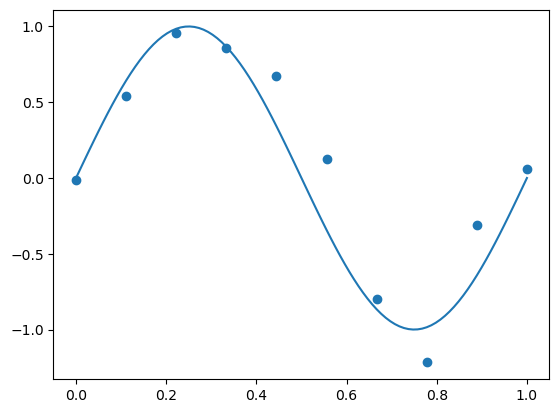

In [3]:
plt.plot(x_true, y_true)
plt.scatter(x, y)
plt.show()

Let's define the regression function:

In [4]:
def f(x, w):
    return np.dot(x, w)

Let's create a fitting function

In [5]:
def train(X, y):
    # pinv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    pinv = np.linalg.pinv(X)
    return np.dot(pinv, y)

Prepare the data for fitting

In [6]:
X = np.vstack((x, np.ones_like(x))).T
print(X.shape)

(10, 2)


Plot the predictions and calculate the error!

W =  [-1.18448556  0.67962615]


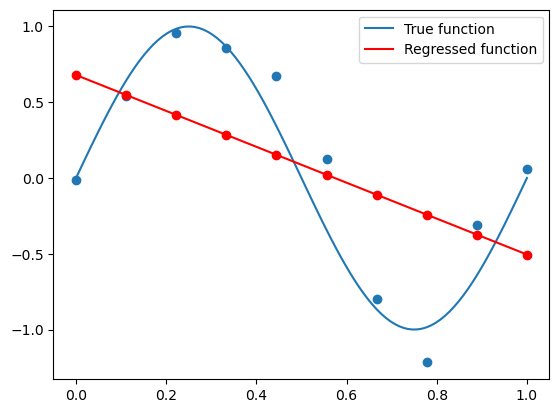

Error =  3.1329523660332717


In [7]:
w = train(X, y)
print("W = ", w)

# Get the predictions
y_pred = f(X, w)

# Get the decision function
x_des = np.linspace(0, 1, 100)
X_des = np.vstack((x_des, np.ones_like(x_des))).T
y_des = f(X_des, w)


plt.plot(x_true, y_true)
plt.plot(x_des, y_des, c='r')
plt.legend(['True function', 'Regressed function'])
plt.scatter(x, y,)
plt.scatter(x, y_pred, c='r')
plt.show()

print("Error = ", np.sum((y - y_pred)**2))


We can also use basis functions!

In [8]:
def expand_basis_polynomial(x, M=2):
    X = np.vstack((x, np.ones_like(x)))
    for i in range(2, M+1):
        X = np.vstack((X, x**(i)))
    return X.T
        

Fitting with various M

In [9]:
def fit_plot_M(M = 1):
    X = expand_basis_polynomial(x, M)
    w = train(X, y)
    print("W = ", w)

    # Get the predictions
    y_pred = f(X, w)
    # Get the decision function
    x_des = np.linspace(0, 1, 100)
    X_des = expand_basis_polynomial(x_des, M) 
    y_des = f(X_des, w)


    plt.plot(x_true, y_true)
    plt.plot(x_des, y_des, c='r')
    plt.legend(['True function', 'Regressed function'])
    plt.scatter(x, y,)
    plt.scatter(x, y_pred, c='r')
    plt.title("M = " + str(M))
    plt.show()
    print("M = ", M, " error = ", np.sum((y - y_pred)**2))

    

W =  [-1.18448556  0.67962615]


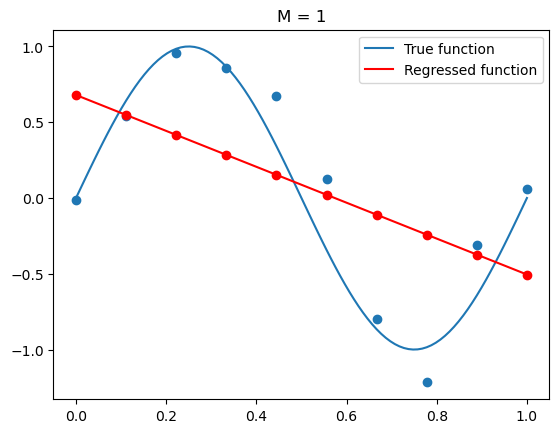

M =  1  error =  3.1329523660332717
W =  [ 11.54987656  -0.15714416 -32.3776214   21.10217508]


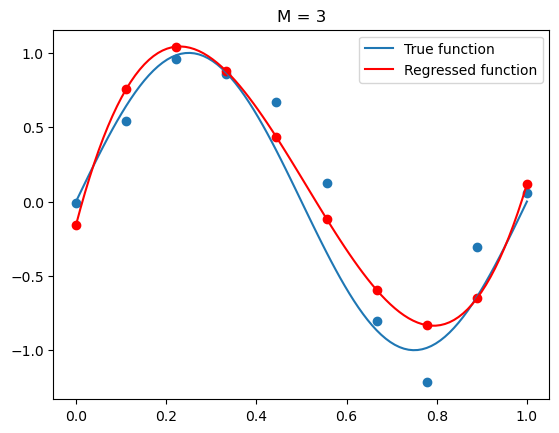

M =  3  error =  0.5025787941690233
W =  [ 7.16045656e-02  2.31923040e-02  5.19214156e+01 -1.95797646e+02
  2.30487267e+02 -8.65841684e+01]


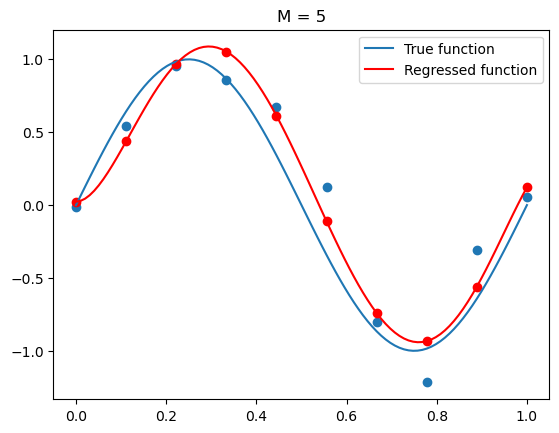

M =  5  error =  0.25957819741294896


In [10]:
for i in [1, 3, 5]:
    fit_plot_M(i)

W =  [-1.81302363e+00 -1.29036132e-02  1.38831402e+02 -9.80097940e+02
  3.08528250e+03 -5.03209745e+03  4.06909668e+03 -1.27913197e+03]


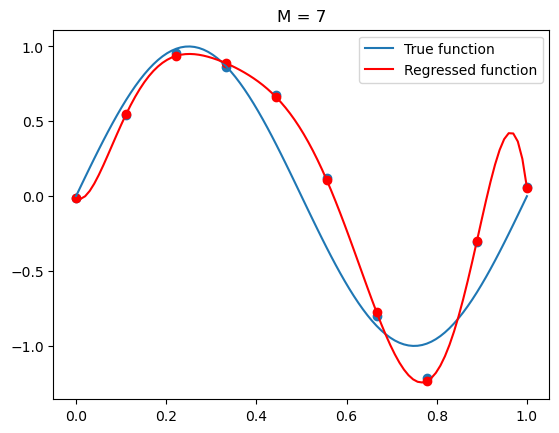

M =  7  error =  0.00252905500017899
W =  [-8.44554058e+00 -1.19641889e-02  2.72300325e+02 -1.98350569e+03
  6.85184787e+03 -1.28126213e+04  1.30243940e+04 -6.61020794e+03
  1.21792567e+03  4.83828232e+01]


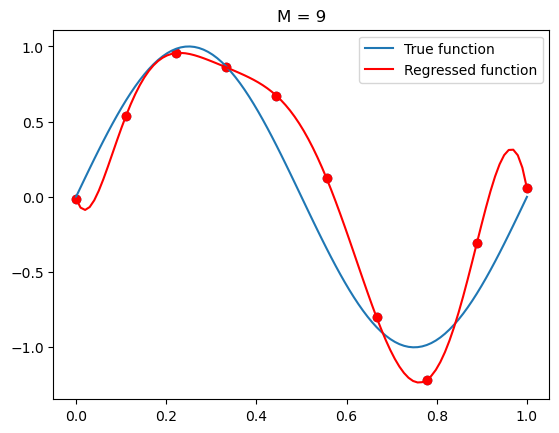

M =  9  error =  5.392705331561238e-20
W =  [-6.95911909e+00 -1.19641889e-02  2.35413618e+02 -1.61882275e+03
  4.94179470e+03 -6.96820261e+03  2.38833519e+03  4.09108599e+03
 -2.55974853e+03 -3.00978518e+03  3.53043455e+03 -1.02347566e+03]


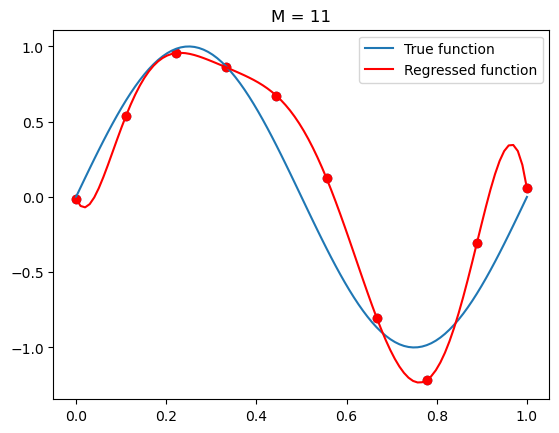

M =  11  error =  3.2259386044655865e-21


In [11]:
for i in [7, 9, 11]:
    fit_plot_M(i)

Let's try to measure validation error as well!

In [12]:
def fit_validation(M = 1):
    X = expand_basis_polynomial(x, M)
    w = train(X, y)

    # Get the predictions
    y_pred = f(X, w)
    
    # Create a validation set
    x_val = np.linspace(0.01, 0.99, 25)
    y_val = np.sin(2*np.pi*x_val) + np.random.randn(*x_val.shape) *0.2
    X_val = expand_basis_polynomial(x_val, M) 
    y_val_pred = f(X_val, w)



    print("M = ", M, " train error = ", np.sum((y - y_pred)**2), " test error = ", np.sum((y_val - y_val_pred)**2))

    

In [13]:
for i in [1, 3, 5, 7, 9, 11]:
    fit_validation(i)

M =  1  train error =  3.1329523660332717  test error =  6.2530928662578615
M =  3  train error =  0.5025787941690233  test error =  1.5489351378067628
M =  5  train error =  0.25957819741294896  test error =  1.365233372623435
M =  7  train error =  0.00252905500017899  test error =  3.3142958715828392
M =  9  train error =  5.392705331561238e-20  test error =  2.2412609921270743
M =  11  train error =  3.2259386044655865e-21  test error =  2.683335957036158
